In [ ]:
#Causal discovery alogorithm implementation using PC and FCI algorithms

#PC
#PC (Peter-Clark) algorithm is a constraint-based causal discovery algorithm that infers causal relationships from observational data by identifying conditional independencies among variables.
#It starts with a fully connected graph and iteratively removes edges based on conditional independence tests, resulting in a partially directed acyclic graph (PDAG) that represents the inferred causal structure.
#Disadvantages of PC algorithm include its sensitivity to the choice of significance level for independence tests and its assumption that there are no latent confounders in the data.
#Further, it doesnt tell you the direction of all edges in the graph, leading to some ambiguity in the inferred causal relationships.


#FCI
#FCI ( Fast Causal Inference) is a constraint-based causal discovery algorithm that can infer causal relationships from observational data, even in the presence of latent confounders and selection bias.
#It extends the PC algorithm by incorporating additional rules to handle these complexities.

In [9]:
import numpy as np
import pandas as pd
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.utils.cit import fisherz
import os

In [11]:
data = pd.read_csv("C:/Users/sahil/Downloads/archive/Student_Performance.csv")

In [98]:
test = data.copy()

In [99]:
test = test.drop(['Extracurricular Activities'], axis = 1)
def standardise(x):
    return (x -x.mean())/(x.max() - x.min())
test = test.apply(standardise, axis = 1)
test.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,0.036465,0.324943,-0.176584,-0.322022
Previous Scores,0.036465,1.000000,0.581578,0.749652,-0.836131
Sleep Hours,0.324943,0.581578,1.000000,0.442572,-0.859907
Sample Question Papers Practiced,-0.176584,0.749652,0.442572,1.000000,-0.770127
Performance Index,-0.322022,-0.836131,-0.859907,-0.770127,1.000000


In [100]:
import random


def introduce_noise(x):
    return x + random.randint(0,10)/10

test = test.apply(introduce_noise, axis = 0)

In [71]:
test

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,-0.151020,0.987755,0.169388,0.087755,1.306122
1,-0.142500,1.032500,0.157500,0.132500,1.220000
2,-0.097959,0.979592,0.181633,0.079592,1.257143
3,-0.100000,1.040000,0.200000,0.140000,1.120000
4,-0.160000,1.011429,0.154286,0.111429,1.282857
...,...,...,...,...,...
9995,-0.108333,1.091667,0.254167,0.212500,0.950000
9996,-0.162712,1.003390,0.154237,0.103390,1.301695
9997,-0.174359,1.012821,0.151282,0.112821,1.297436
9998,-0.136082,0.971134,0.143299,0.071134,1.350515


In [72]:
np.linalg.matrix_rank(np.corrcoef(test.values, rowvar=False))#Need to introduce random noise if rank < #columns

np.int64(4)

In [73]:
test_np = test.to_numpy()
test_np

array([[-0.15102041,  0.9877551 ,  0.16938776,  0.0877551 ,  1.30612245],
       [-0.1425    ,  1.0325    ,  0.1575    ,  0.1325    ,  1.22      ],
       [-0.09795918,  0.97959184,  0.18163265,  0.07959184,  1.25714286],
       ...,
       [-0.17435897,  1.01282051,  0.15128205,  0.11282051,  1.2974359 ],
       [-0.13608247,  0.97113402,  0.14329897,  0.07113402,  1.35051546],
       [-0.1260274 ,  0.99178082,  0.18767123,  0.09178082,  1.25479452]],
      shape=(10000, 5))

In [74]:
alpha = 0.05
indep_test_func = fisherz
X = test_np

In [75]:
# run FCI
print(f"Running FCI on data with shape {X.shape}, alpha={alpha} ...")
result = fci(X, alpha=alpha, indep_test_func=indep_test_func)

Running FCI on data with shape (10000, 5), alpha=0.05 ...


Depth=0, working on node 4: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 387.98it/s]


Graph saved to causal_graph.png


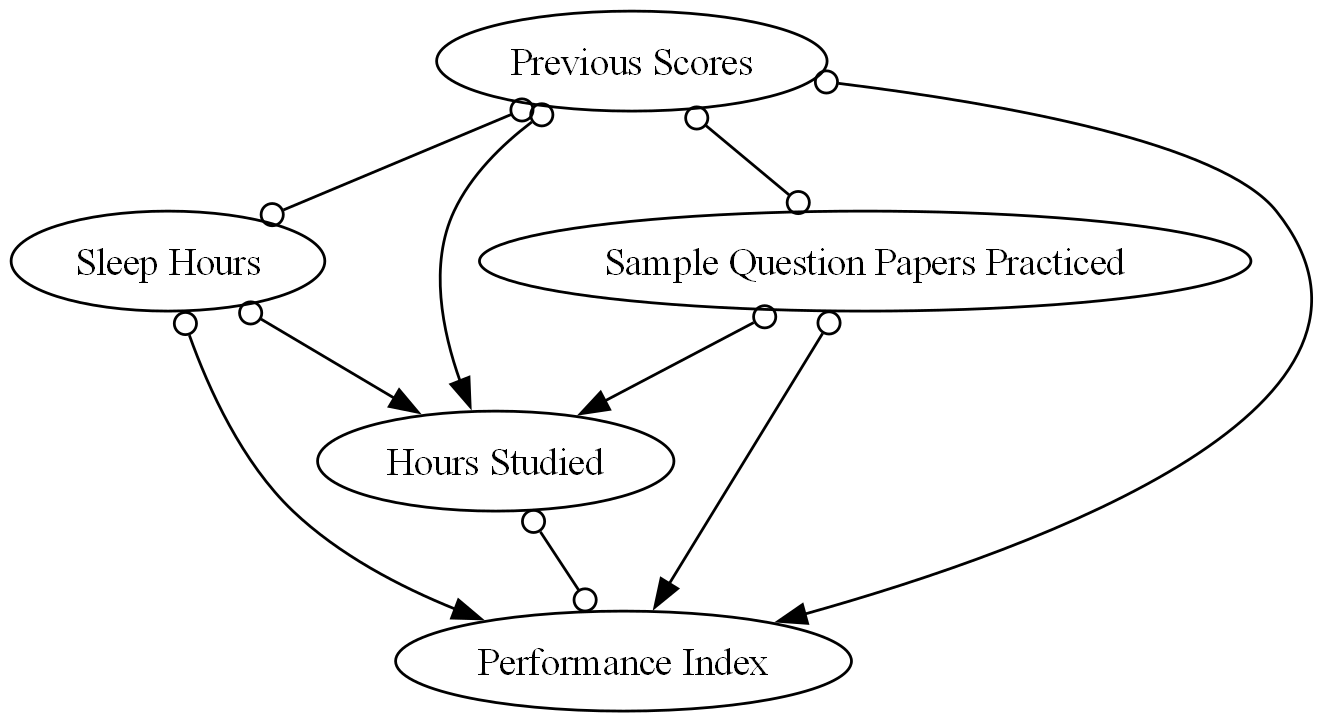

In [85]:
pydot_graph = GraphUtils.to_pydot(result[0], labels=list(test.columns))


# Save and display the graph
try:
    pydot_graph.write_png('causal_graph.png')
    print("Graph saved to causal_graph.png")
    
    # If in a Jupyter environment, this will display the image
    from IPython.display import Image, display
    display(Image(pydot_graph.create_png()))
    
except Exception as e:
    print(f"Error during visualization: {e}")
    print("Please ensure Graphviz is installed and in your system's PATH.")

In [90]:
def convert(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return None

In [101]:
test = pd.DataFrame(test_np, columns = test.columns)
test = pd.concat([test, data['Extracurricular Activities']], axis = 1)
test['Extracurricular Activities'] = test['Extracurricular Activities'].apply(convert)
test.head(n = 4)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities
0,-0.151020,0.987755,0.169388,0.087755,1.306122,1
1,-0.142500,1.032500,0.157500,0.132500,1.220000,0
2,-0.097959,0.979592,0.181633,0.079592,1.257143,1
3,-0.100000,1.040000,0.200000,0.140000,1.120000,1


In [102]:
test_np = test.to_numpy()
test_np

array([[-0.15102041,  0.9877551 ,  0.16938776,  0.0877551 ,  1.30612245,
         1.        ],
       [-0.1425    ,  1.0325    ,  0.1575    ,  0.1325    ,  1.22      ,
         0.        ],
       [-0.09795918,  0.97959184,  0.18163265,  0.07959184,  1.25714286,
         1.        ],
       ...,
       [-0.17435897,  1.01282051,  0.15128205,  0.11282051,  1.2974359 ,
         1.        ],
       [-0.13608247,  0.97113402,  0.14329897,  0.07113402,  1.35051546,
         1.        ],
       [-0.1260274 ,  0.99178082,  0.18767123,  0.09178082,  1.25479452,
         0.        ]], shape=(10000, 6))

In [105]:
discrete_data_indices = [5]

In [109]:
from causallearn.utils.cit import KCI

In [110]:
cg = fci(test_np, alpha=0.05, indep_test = KCI, discrete_data_indices=discrete_data_indices)

Depth=0, working on node 5: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 291.23it/s]


Graph saved to causal_graph.png


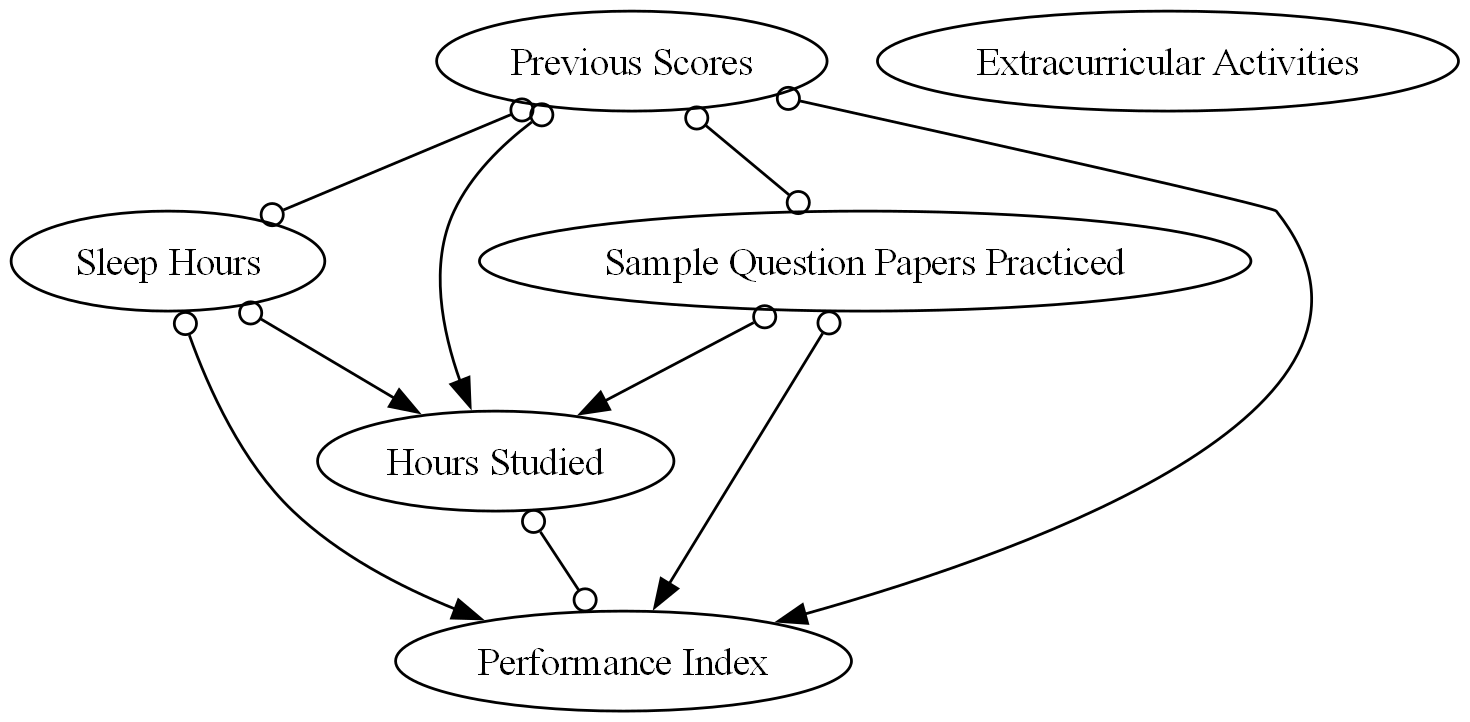

In [114]:
pydot_graph = GraphUtils.to_pydot(cg[0], labels=list(test.columns))


# Save and display the graph
try:
    pydot_graph.write_png('causal_graph.png')
    print("Graph saved to causal_graph.png")
    
    # If in a Jupyter environment, this will display the image
    from IPython.display import Image, display
    display(Image(pydot_graph.create_png()))
    
except Exception as e:
    print(f"Error during visualization: {e}")
    print("Please ensure Graphviz is installed and in your system's PATH.")

In [112]:
from causallearn.utils.cit import gsq

In [113]:
result = fci(test_np, alpha=0.05, indep_test_func=gsq)

Depth=0, working on node 5: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 327.94it/s]


Graph saved to causal_graph.png


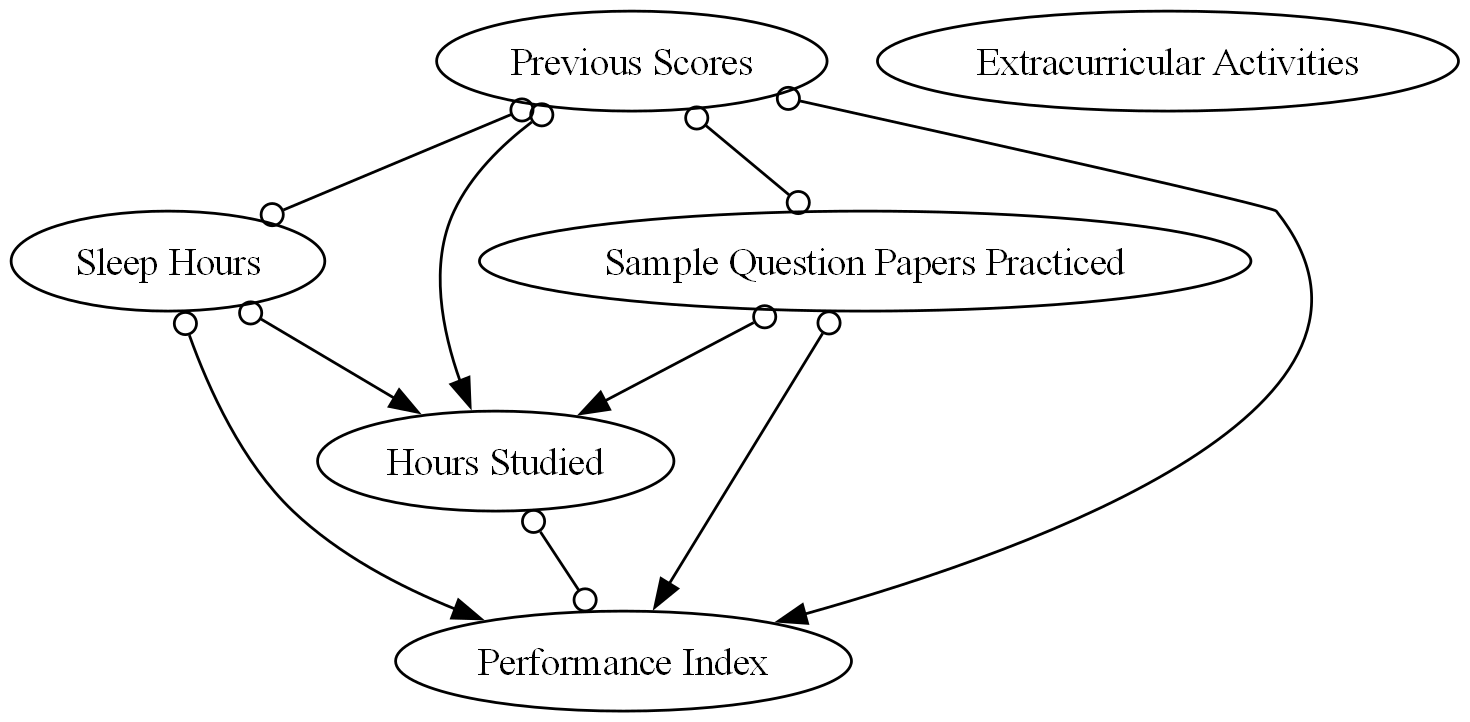

In [115]:
pydot_graph = GraphUtils.to_pydot(result[0], labels=list(test.columns))


# Save and display the graph
try:
    pydot_graph.write_png('causal_graph.png')
    print("Graph saved to causal_graph.png")
    
    # If in a Jupyter environment, this will display the image
    from IPython.display import Image, display
    display(Image(pydot_graph.create_png()))
    
except Exception as e:
    print(f"Error during visualization: {e}")
    print("Please ensure Graphviz is installed and in your system's PATH.")

In [119]:
test[test['Extracurricular Activities'] == 1].corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities
Hours Studied,1.000000,0.024174,0.322416,-0.188854,-0.310721,NaN
Previous Scores,0.024174,1.000000,0.574509,0.748326,-0.833811,NaN
Sleep Hours,0.322416,0.574509,1.000000,0.439610,-0.858514,NaN
Sample Question Papers Practiced,-0.188854,0.748326,0.439610,1.000000,-0.770471,NaN
Performance Index,-0.310721,-0.833811,-0.858514,-0.770471,1.000000,NaN
Extracurricular Activities,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
test[test['Extracurricular Activities'] == 0].corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities
Hours Studied,1.000000,0.045350,0.325540,-0.166248,-0.330488,NaN
Previous Scores,0.045350,1.000000,0.587363,0.751189,-0.837960,NaN
Sleep Hours,0.325540,0.587363,1.000000,0.445219,-0.860877,NaN
Sample Question Papers Practiced,-0.166248,0.751189,0.445219,1.000000,-0.770202,NaN
Performance Index,-0.330488,-0.837960,-0.860877,-0.770202,1.000000,NaN
Extracurricular Activities,NaN,NaN,NaN,NaN,NaN,NaN
